In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('all_data_copy.csv')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [6]:
data.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [7]:
data.duplicated().value_counts()

True     188012
False    185688
dtype: int64

In [11]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [17]:
data['Month'] = data['Order Date'].str[0:2]#get the first 2 characters
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [16]:
non_df = data[data.isna().any(axis=1)]
non_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#removing Non values
data = data.dropna(how='all')
#removing row based on condition, finding 'Or' and delete it
df_dummy = data[data['Order Date'].str[0:2]=='Or']
df_dummy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [24]:
#removing Non values
data = data.dropna(how='all')
#removing row based on condition, finding 'Or' and delete it
data = data[data['Order Date'].str[0:2]!='Or']
#add month column
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
#convert 'Quantity Order' and 'Price Each' to numeric
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
#add sales column
data['Sales'] = data['Quantity Ordered']*data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [26]:
data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3.623537e+06,3.644513e+06
2,26898,4.377769e+06,4.404045e+06
3,34010,5.582416e+06,5.614201e+06
4,41116,6.735342e+06,6.781340e+06
5,37334,6.270250e+06,6.305214e+06
6,30506,5.124051e+06,5.155605e+06
7,32144,5.265079e+06,5.295552e+06
8,26896,4.460691e+06,4.488936e+06
9,26218,4.169984e+06,4.195120e+06


## Visualizing Results

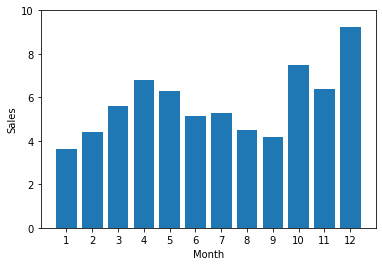

In [28]:
#Which Month had the highest amount of sales overall?

months = range(1,13)#for x axes
results = data.groupby('Month').sum()
plt.bar(months, results['Sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [30]:
#add 'City' column
data['City'] = data['Purchase Address'].apply(lambda x:x.split(',')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [34]:
results = data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,33204,5.559816e+06,209588,5.590997e+06
Austin,22306,3.619747e+06,139658,3.639164e+06
Boston,45056,7.274820e+06,282224,7.323284e+06
Dallas,33460,5.505256e+06,209240,5.535951e+06
Los Angeles,66578,1.084287e+07,416650,1.090514e+07
New York City,55864,9.270742e+06,351482,9.328635e+06
Portland,28106,4.615495e+06,175530,4.640981e+06
San Francisco,100478,1.642292e+07,631040,1.652441e+07
Seattle,33106,5.466592e+06,209882,5.495511e+06


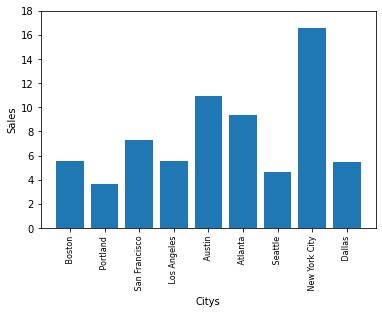

In [35]:
#Which city had the highest sales overall?

cities = data['City'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical',size =8)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales')
plt.xlabel('Citys')
plt.show()

In [48]:
'''Find out the distribution of sales over different times of the day 
(Morning, Afternoon, Evening, Night)and answer the following for each city;'''
#create new column in date-time object(DTO)
data['Order_Date_DTO'] = pd.to_datetime(data['Order Date'])
#Extraction the hours data
data['Hour'] = data['Order_Date_DTO'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,2019-01-22 21:25:00,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,2019-01-28 14:15:00,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,2019-01-17 13:33:00,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,2019-01-05 20:33:00,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,2019-01-25 11:59:00,11


In [49]:
results2 = data.groupby(['Hour']).count()
results2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO
Hour,,,,,,,,,,
0,7820,7820,7820,7820,7820,7820,7820,7820,7820,7820
1,4700,4700,4700,4700,4700,4700,4700,4700,4700,4700
2,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486
3,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662
4,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708
5,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642
6,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
7,8022,8022,8022,8022,8022,8022,8022,8022,8022,8022
8,12512,12512,12512,12512,12512,12512,12512,12512,12512,12512


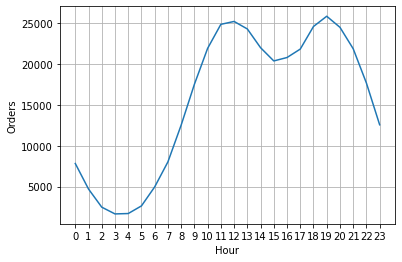

In [50]:
results2 = data.groupby(['Hour'])['Quantity Ordered'].count()
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, results2)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.grid()
plt.show()

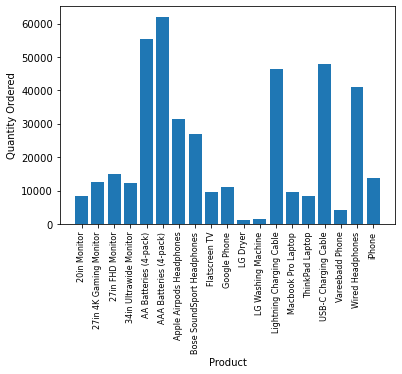

In [53]:
#What products are mostly sold at different times of the day?

product_group = data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size=8)
plt.show()

<ipython-input-64-30608bea3e94>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(products, rotation='vertical', size=8)


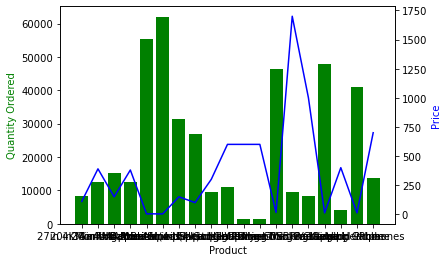

In [64]:
'''Find out the pair of products that are most sold together.
For example, generally, we would expect a person who buys 
an iPhone 11 to also buy the Apple Airpods together with it.
Identify such pairs of products and suggest what promotional 
offers should the retail company come up with based on your outcome.'''

prices = data.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices,'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax2.set_xticklabels(products, rotation='vertical', size=8)

plt.show()